## ONE SAMPLE T-TEST, TWO SAMPLE T-TEST,PAIRED T-TEST, Z-TEST,SHAPIRO WILK TEST,JARQUE BERA TEST

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.robust.scale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
from scipy import stats
import wquantiles
import statsmodels
import statsmodels.robust.scale
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import sklearn


### One-Sample t Test - Two Sided

Question:
The Violet industries produces furniture for home and office use. The production engineer claims that the average number of furniture items produced is 30. Test his claim.
item_produced=34,34,23,45,23,45,34,23,37,35

Ho-average number of furniture items produced is 30(u=30)
H1-average number of furniture items produced is not equal to 30(u<>30)


In [48]:
list1=[34,34,23,45,23,45,34,23,37,35]
df=pd.DataFrame(list1,columns=['Items Produced'])#dataframe
print(stats.ttest_1samp(df['Items Produced'],30))# ttest_1samp used for one sample t test
### here we get P_VALUE = 0.2368 they didnt give alpha value..hence we took as 5% ie) 0.05
## 0.2368>0.05, then Accept NULL HYPOTHESIS, Reject Alternate Hypothesis

# FROM THE OBSERVATION WE CAN CONCLUDE THAT AVERAGE NUMBER OF FURNITURE ITEMS PRODUCED IS EQUAL TO 30


Ttest_1sampResult(statistic=1.2674612253287467, pvalue=0.23680061493494728)


### One Sample t test - One Sided

Question:
The Blaze Industries Pvt. Ltd. claims that their manufactured electric bulbs have a life of 45000 hrs. Test the their claim at 5% level of significance.
LIFE_IN_HRS=[35000,49000,44000,45900,43400,50000,47200,32700,33200,43000,46300,47800,32100,33200,33900]

Ho-electric bulbs have a life of 45000 hrs(u=45000)
H1-electric bulbs have a life less than 45000 hrs(u<=45000)


0.022628491566062506


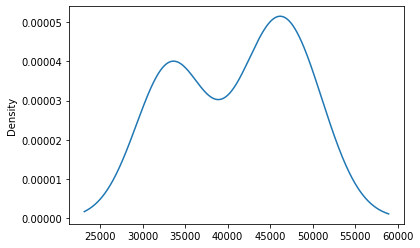

In [47]:
list1=[35000,49000,44000,45900,43400,50000,47200,32700,33200,43000,46300,47800,32100,33200,33900]
df_life=pd.DataFrame(list1,columns=['Life_in_hrs'])#dataframe
df_life_pvalues=stats.ttest_1samp(df_life['Life_in_hrs'],45000)# ttest_1samp used for one sample t test
# to get the pvalue for one tail test..we have to didvide the p value by 2.
p_value=df_life_pvalues.pvalue/2
print(p_value)
### here we get P_VALUE = 0.0226 they give SIGNIFICANT(alpha) value as 5% ie) 0.05
## 0.0226<0.05, then Reject Null Hypothesis, Accept ALTERNATE HYPOTHESIS

# FROM THE OBSERVATION WE CAN CONCLUDE THAT AVERAGE LIFE OF BULBS <45000.
# THE MANUFACTURERS CLAIM IS FALSE.

df_life['Life_in_hrs'].plot(kind='kde')

###  Two-Sample Test for Mean
The department of transportation of UK considers sample of 6 metro cities in UK and collect the data on average number of road accidents in two year, before and after pandemic. Transportation ministry believes that there is significant difference in average number of road accidents in year 2019 and 2020 after lockdown in pandemic situation . Assume that the difference between two samples follow normal distribution.
Can we conclude that there is effect of lockdown on road accidents? Test 

Avg.no.of road accidents in 2018= 120,142,105,167,109,94
Avg.no.of road accidents in 2019= 139,123,89,144,97,68

Ho-There is effect of lockdown on road accidents
H1-There is no effect of lockdown on road accidents

Ttest_indResult(statistic=0.7759116903877894, pvalue=0.4557597290620905)


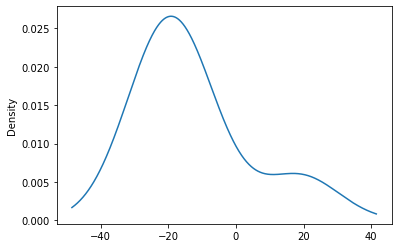

In [60]:
list1=[120,142,105,167,109,94]
list2=[139,123,89,144,97,68]
df=pd.DataFrame({'2018':list1,'2019':list2,'change':(np.array(list2)-np.array(list1))})#dataframe
df_pvalue=stats.ttest_ind(a=df['2018'],b=df['2019'])#ttest_ind(independent samples)
print(df_pvalue)
df['change'].plot(kind='kde')
#hence, pvalue=0.4557 >0.05 is alpha value, then accept NULL HYPOTHESIS and reject Alternate Hypothesis

### TWO SAMPLE T-TEST
In a pig farm, to increase the weight of the pigs two different diets were given. The data for gain in weight is as given. Test whether the two diets differ significantly regarding their effect on increase in weight
diet A=45,34,46,23,67,45,65,23,65,23
diet B=45,35,32,47,37,51,42,38,32,46

Ho- Avg. gain in weight due to diet A = Avg. gain in weight due to diet B
H1- Avg. gain in weight due to diet A <> Avg. gain in weight due to diet B

In [55]:
diet_A=[45,34,46,23,67,45,65,23,65,23]
diet_B=[45,35,32,47,37,51,42,38,32,46]
df_diet=pd.DataFrame({'diet A':diet_A,'diet B':diet_B})
stats.ttest_ind(a=df_diet['diet A'],b=df_diet['diet B'])#independent sample
## p value> alpha value
# 0.6115 > 0.05
# hence,accept NuLL HYPOTHESIS and Reject Alternate Hypothesis
# We can conclude that avg. weight gained due to diet A and diet B both are same

Ttest_indResult(statistic=0.5169140149580205, pvalue=0.6115094596012607)

### Paired t test 

Question:

An pharma company claims to have have produced a new drug which improves sleep of 18 year old teenagers. The hours of sleep for 10 teenagers before and after the giving the new drug is recorded. Test whether there is a significant difference in the average hours of sleep.

hrs_of_sleep_before = 5,6,6.5,5.5,6.5,7,8,7.5,6,7
hrs_of_sleep_after= 7,7.5,9,7,8,7.5,7,7,7,6.5

Ho-there is no difference in the average hours of sleep.
H1-there is a significant difference in the average hours of sleep.


In [66]:
hrs_of_sleep_before =[5,6,6.5,5.5,6.5,7,8,7.5,6,7]
hrs_of_sleep_after= [7,7.5,9,7,8,7.5,7,7,7,6.5]
df_sleep=pd.DataFrame({'Before':[5,6,6.5,5.5,6.5,7,8,7.5,6,7],'After':[7,7.5,9,7,8,7.5,7,7,7,6.5],'change':np.array(hrs_of_sleep_after)-np.array(hrs_of_sleep_before)})
stats.ttest_rel(a=df_sleep['Before'],b=df_sleep['After'])#ttest_rel(relative samples)
# p value < alpha value 
## ie) 0.0487 < 0.05 
## hence.. Reject Null hypothesis and accept ALTERNATE HYPOTHESIS
# we can conclude that there is significant difference in the average hours of sleep.drug having impact on sleep.

Ttest_relResult(statistic=-2.2785119632047284, pvalue=0.048680802344322635)

### one sample test >30 samples

A random sample of 40 glass rods is taken from a lot manufactured under a new process. They are tested for their breaking strength. Can we claim that the breaking strength is equal to 55 lbs?
samples:
48.6,57.6,55,54.8,38.8,46.4,50.2,55.6,52.6,52.5,57,58.4,48,55.5,51.2,45,60.2,53.5,39.5,42.8,54.6,54.9,58.2,54.8,42.7,58.8,46.8,45.7,42.1,41.8,38,44.3,49.8,58.6,56.6,38.4,57.8,48.7,41,54.3


Ho- u=55( the mean breaking strength is equal to 55 lbs)
H1- u<>55(( the mean breaking strength is not equal to 55 lbs)

In [83]:
from statsmodels.stats import weightstats as stests
df_g30=pd.DataFrame({'Strength in lbs':[48.6,57.9,55,54.8,38.8,46.4,50.2,55.6,52.6,52.5,57,58.4,48,55.5,51.2,45,60.2,53.5,39.5,42.8,54.6,54.9,58.2,54.8,42.7,58.8,46.8,45.7,42.1,41.8,38,44.3,49.8,58.6,56.6,38.4,57.8,48.7,41,54.3]})
stests.ztest(df_g30['Strength in lbs'],value=55)
# pvalue is < alpha value..p value is almost 0 which is lesser than 0.05, then reject null hypothesis.
# ACCEPT ALTERNATE HYPOTHESIS. ie) The mean breaking strength is not equal to 55 lbs

(-4.431740748679182, 9.347536680921983e-06)

### Two Large Sample Test for Mean 
Question:
Two types of fertilizers are tested on farm lands of the same size. The yields in quintals are given below. Can we conclude that the two fertilizers have the same yield?

fertilizer_1=23,30,36,46,34,46,43,34,45,41,26,32,32,35,45,46,34,43,32,36,54,24,47,25,39,36,42,46,34,25,31,34,28,33,35
fertilizer_2=45,23,36,29,34,54,37,37,21,53,37,35,34,34,29,47,45,45,30,43,32,43,31,31,46,45,38,43,53,32,42,43,24,47,48

Ho= Two fertilizers having same avg. yield
H1= There is difference in the avg. yield of fertilizers


In [85]:
df_fertilizer=pd.DataFrame({'fertilizer_1':[23,30,36,46,34,46,43,34,45,41,26,32,32,35,45,46,34,43,32,36,54,24,47,25,39,36,42,46,34,25,31,34,28,33,35],'fertilizer_2':[45,23,36,29,34,54,37,37,21,53,37,35,34,34,29,47,45,45,30,43,32,43,31,31,46,45,38,43,53,32,42,43,24,47,48]})
stests.ztest(x1=df_fertilizer['fertilizer_1'],x2=df_fertilizer['fertilizer_2'])
# Hence, p value > 0.05..then accept NULL HYPOTHESIS and reject Alternate Hypothesis
# We can concluse that there is no difference in the average yield of two fertilizers

(-1.0828624134320954, 0.27886949738924627)

### Shapiro-Wilk test

Ho - DATA IS NORMALLY DISTRIBUTED
H1-  DATA IS NOT NORMALLY DISTRIBUTED

(0.9564007520675659, 8.226061254390515e-06)


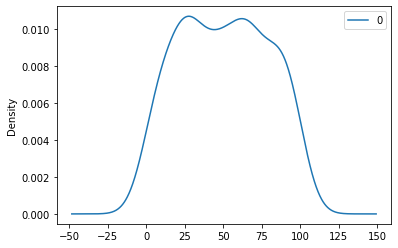

In [4]:
rainfall=np.random.random(200)*100
dff=pd.DataFrame(rainfall)
from scipy.stats import shapiro, jarque_bera
a=shapiro(rainfall)
## pvalue(0.000) < 0.05(alpha) reject Null hypothesis
# accept ALTERNATE HYPOTHESIS ie) DATA IS NOT NORMALLY DISTRIBUTED
print(a)
dff.plot(kind='kde')

### Jarque-Bera Test

Ho - DATA IS NORMALLY DISTRIBUTED
H1-  DATA IS NOT NORMALLY DISTRIBUTED

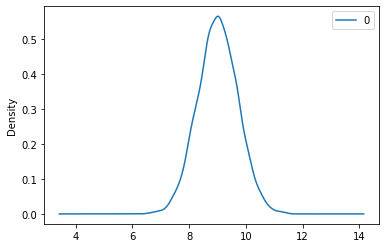

In [5]:
rain=np.random.normal(loc=4,scale=0.7,size=6000)+np.random.normal(loc=5,scale=0.1,size=6000)
df=pd.DataFrame(rain)
s,p=jarque_bera(rain)
s,p
df.plot(kind='kde')
# 0.5101 > 0.05 (p> alpha). 
## Hence, accept NULL HYPOTHESIS ie)DATA IS NORMALLY DISTRIBUTED

### ONE WAY ANOVA TEST- EXAMPLE 1
980	1123	1084
776	1357	1025
923	1152	1114
1498 921	1182
999	 959	1022
Ho-Mean sales for all city is same				
H1-Mean sales for all city is not same				

In [2]:
delhi=[980,776,923,1498,999]
mumbai=[1123,1357,1152,921,959]
bangalore=[1084,1025,1114,1182,1022]
stats.f_oneway(delhi,mumbai,bangalore)
# p value(0.8477) >ALPHA(0.05), ACCEPT Ho reject H1
#F-ratio(0.167)<CRITICAL VALUE(3.88),ACCEPT Ho reject H1

F_onewayResult(statistic=0.1674988772246274, pvalue=0.8477211677490336)

### ONE WAY ANOVA TEST- EXAMPLE 2
A firm wishes to compare 4 programmes for training workers to perform a certain task. 20 new employees are randomly assigned to these programmes with 5 in each. At the end of the training, a test is conducted to see how quickly the trainees perform that task. The number of times the task is performed per hour is recorded for each trainee
Perform ANOVA to check the effectiveness of the programme. (Assume the level of significance = 0.05)
A	B	C	D
9	10	12	9
12	6	14	8
14	9	11	11
11	9	13	7
13	10	11	8

Ho- There is no difference In effectiveness of the programme(u1=u2=u3=u4)											
H1- There is atleast one different in effectiveness of the programme(u1<>u2<>u3<>u4)											


In [3]:
a=[9,12,14,11,13]
b=[10,6,9,9,10]
c=[12,14,11,13,11]
d=[9,8,11,7,8]
stats.f_oneway(a,b,c,d)
# p value(0.00311) <ALPHA(0.05), ACCEPT H1 reject Ho
#F-ratio(7.0448)>CRITICAL VALUE(3.2389),ACCEPT H1 reject Ho

F_onewayResult(statistic=7.044871794871795, pvalue=0.0031129438989961743)

### ONE WAY ANOVA TEST- EXAMPLE 3
The management of the institute wanted to conduct an experiment with one factor of average grades for 4 different courses, and each course has 12 students with their grade marks.

The sum of squares for between groups for this data is SSb/w=189

The mean sum of squares for within groups for this data is MSw=10

Calculate F statistic.


Ho- There is no difference (u1=u2=u3=u4)											
H1- There is a difference(u1<>u2<>u3<>u4)											


In [4]:
#From the given:
k=4
n=48
SSC=189
SSE=10
#DOF=k-1
DOF=3
#dof=n-k
dof=44
#critical value	2.8387
msc=SSC/DOF
mse=SSE/dof
F_ratio=msc/mse
F_ratio
#F-ratio(277.2)>CRITICAL VALUE(2.8387),ACCEPT H1 reject Ho

277.2

### ONE WAY ANOVA TEST- EXAMPLE 4
The test hypothesis is:										
Ho: The average salaries for each group is equal, i.e. μhigh school = μgraduate = μpost graduate										
Ha: At least one pair of averages is not equal, i.e. μhigh school ≠ μgraduate ≠ μpost graduate										
	High School	Graduate	Post Graduate
	2000	1500	2250
	1050	2000	2700
	950	    2550	2000
	1000	2250	1500


In [5]:
high_school=[2000,1050,950,1000]
graduate=[1500,2000,2550,2250]
post_graduate=[2250,2700,2000,1500]
stats.f_oneway(high_school,graduate,post_graduate)
# p value(0.0549) >ALPHA(0.05), ACCEPT Ho reject H1
#F-ratio(4.0753)<CRITICAL VALUE(4.2565),ACCEPT Ho reject H1

F_onewayResult(statistic=4.075320035724919, pvalue=0.054932554455117105)

### POST HOC TEST - Tukey’s HSD Test
A firm wishes to compare 4 programmes for training workers to perform a certain task. 20 new employees are randomly assigned to these programmes with 5 in each. At the end of the training, a test is conducted to see how quickly the trainees perform that task. The number of times the task is performed per hour is recorded for each trainee
Perform ANOVA to check the effectiveness of the programme. (Assume the level of significance = 0.05)
A	B	C	D
9	10	12	9
12	6	14	8
14	9	11	11
11	9	13	7
13	10	11	8

Ho- There is no difference In effectiveness of the programme(u1=u2=u3=u4)											
H1- There is atleast one different in effectiveness of the programme(u1<>u2<>u3<>u4)											
we can conclude that there is a difference exists among the programme.but to find where difference exists we go for post hoc test..there are many types of post hoc there ..among them 1.TUKEY'S HSD


In [17]:
##TUKEY'S HSD
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
dff=pd.DataFrame({'a':[9,12,14,11,13],
'b':[10,6,9,9,10],
'c':[12,14,11,13,11],
'd':[9,8,11,7,8]})
stack_dff=dff.stack().reset_index()# stack the data and reset the index


In [11]:
stack_dff=stack_dff.rename(columns={'level_0':'id','level_1':'programme',0:'number of tasks'})# rename the columns
stack_dff

,id,programme,number of tasks
0,0,a,9
1,0,b,10
2,0,c,12
3,0,d,9
4,1,a,12
5,1,b,6
6,1,c,14
7,1,d,8
8,2,a,14
9,2,b,9


In [14]:
MultiComp=MultiComparison(stack_dff['number of tasks'],stack_dff['programme'])# set up the data for comparison(creates specialised object)
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b     -3.0 0.0428 -5.9179 -0.0821   True
     a      c      0.4    0.9 -2.5179  3.3179  False
     a      d     -3.2 0.0292 -6.1179 -0.2821   True
     b      c      3.4 0.0198  0.4821  6.3179   True
     b      d     -0.2    0.9 -3.1179  2.7179  False
     c      d     -3.6 0.0133 -6.5179 -0.6821   True
----------------------------------------------------


### CHI-SQUARE TEST - TEST OF INDEPENDENCE
Question:

The data gives the distribution of students according to the type of music they prefer and their IQ level.Test whether the type of preferred music and IQ level are independent.
IQ level(high,medium,low) in x axis

MUSIC>>

1.Classical  : 45,32,13
2.Semi-Classical: 58,62,30
3.ROCK: 87,126,87


In [ ]:
Ho -- The attributes IQ level and Music are independent of each other
H1 -- The attributes IQ level and Music are dependent

In [4]:
#import the required library
from scipy.stats import chi2_contingency

#write the data
frequencies=np.array([[45,32,13],[58,62,30],[87,126,87]])

#perform the test
statistic,p,dof,expected=chi2_contingency(frequencies)

statistic,p,dof,expected

#p_value(0.00145)< alpha value(0.05) REJECT Ho and ACCEPT H1
## Wemay conclude that the attributes IQ level and music are dependent

(17.640883327199113,
 0.0014503134604129857,
 4,
 array([[ 31.66666667,  36.66666667,  21.66666667],
        [ 52.77777778,  61.11111111,  36.11111111],
        [105.55555556, 122.22222222,  72.22222222]]))

### CHI SQUARE TEST - GOODNESS OF FIT

Question:
A marketing manager at at Apple Inc. claims that silver colored iPad’s have 43% demand, space grey have 48% demand and gold colored have only 9% demand.
From a sample of 560 buyers of iPads, the color of device was recorded.
Test the managers claim.

COLOR OF IPAD:

SILVER-280
SPACE GREY-190
GOLD-90

In [ ]:
Ho -- There is no difference between observed frequencies and expected frequencies from the specified distribution
H1 -- There is difference between observed frequencies and expected frequencies from the specified distribution

In [5]:
# import the required library
from scipy.stats import chisquare

# observed frequencies are
observed_freq=[280,190,90]

#expected frequencies are
#multiply the chance of each color by sample size in order to obtain the frequencies
expected_freq=[560 * 0.43,560*0.48, 560*0.09]

#perform the test
chisquare(observed_freq,expected_freq)

# p value(0.0000)< alpha(0.05), reject NULL HYPOTHESIS(Ho)
## We may conclude that the managers claim is false

Power_divergenceResult(statistic=60.59627630121817, pvalue=6.945216514453092e-14)

# CHI square test - EXAMPLE-01
## to find the relationship between two categorical variables

In [49]:
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
len(data[(data['sex']=='Male') & (data['smoker']=='Yes')])
    #& data['smoker']=='Yes']

60

In [86]:
ds=pd.crosstab(data['sex'],data['smoker'])
observed_values=ds.values
observed_values

array([[60, 97],
       [33, 54]], dtype=int64)

In [87]:
val=stats.chi2_contingency(ds)
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [88]:
expected_values=val[3]
expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [89]:
no_of_rows=len(ds.iloc[0:2,0])
no_of_columns=len(ds.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print(ddof)

1


In [90]:
alpha=0.05

In [91]:
chi_sq=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_stats=chi_sq[0]+chi_sq[1]
chi_square_stats

0.001934818536627623

In [93]:
critical_val=stats.chi2.ppf(q=1-alpha,df=ddof)
critical_val

3.841458820694124

In [82]:
[p_value=1-stats.chi.cdf(x=chi_square_stats,df=ddof)
p_value]

0.9984562391248537

In [83]:
if p_value>alpha:
    print("Accept Ho,There is no difference between two categorical variables")
else:
    print("Reject Ho,There is difference between two categorical variables")

Accept Ho,There is no difference between two categorical variables


In [84]:
if chi_square_stats<critical_val:
    print("Accept Ho, There is no difference between two categorical variables")
else:
    print("Reject Ho, There is difference between two categorical variables")

Accept Ho, There is no difference between two categorical variables


# EXAMPLE 2

In [101]:
dff=sns.load_dataset('fmri')
#[u'anscombe', u'attention', u'brain_networks', u'car_crashes', u'dots', 
#u'exercise', u'flights', u'fmri', u'gammas', u'iris', u'planets', u'tips', 
#u'titanic']
dff.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [110]:
# OBSERVED VALUES
df=pd.crosstab(dff['event'],dff['region'])
observed_values=df.values
observed_values

array([[266, 266],
       [266, 266]], dtype=int64)

In [111]:
# EXPECTED VALUES
expected=stats.chi2_contingency(df)
expected_values=expected[3]
expected_values

array([[266., 266.],
       [266., 266.]])

In [136]:
# ALPHA
alpha=0.05

In [135]:
# CHI-SQUARE VALUE
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square1=chi_square[0]+chi_square[1]
chi_square1

0.0

In [137]:
# CRITICAL VALUE
critical=stats.chi2.ppf(q=1-alpha,df=ddof)
critical

9.487729036781154

In [139]:
# P-VALUE
p_value=1-stats.chi.cdf(x=chi_square1,df=ddof)
p_value

1.0

In [140]:
if p_value>alpha:
    print("Accept Ho,There is no difference between two categorical variables")
else:
    print("Reject Ho,There is difference between two categorical variables")

Accept Ho,There is no difference between two categorical variables


In [141]:
if chi_square_stats<critical_val:
    print("Accept Ho, There is no difference between two categorical variables")
else:
    print("Reject Ho, There is difference between two categorical variables")

Accept Ho, There is no difference between two categorical variables


# Hypothesis testing types by gagan sir

# ONE SAMPLE T TEST

In [4]:
df=pd.read_csv('Pima.te.csv')
df.head()

,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes


In [5]:
df.shape

(332, 9)

In [7]:
blood_pressure=df['bp']
blood_pressure_sample=blood_pressure.sample(15,random_state=1)
blood_pressure.mean()

71.65361445783132

In [8]:
ttest,p_value=stats.ttest_1samp(blood_pressure_sample,71)
ttest,p_value

(0.13111281304509012, 0.8975515375075431)

In [9]:
alpha=0.05

In [10]:
critical_value=stats.t.ppf(q=1-alpha, df=14)
critical_value

1.7613101357748562

In [11]:
if ttest>=critical_value:
    print("Reject Null Hypothesis-H0, because means of the sample and the population are different")
else:
    print("Accept Null Hypothesis-H0, because means of the sample and the population are same")
    
if p_value<=alpha:
    print("Reject Null Hypothesis-H0, because means of the sample and the population are different")
else:
    print("Accept Null Hypothesis-H0, because means of the sample and the population are same")


Accept Null Hypothesis-H0, because means of the sample and the population are same
Accept Null Hypothesis-H0, because means of the sample and the population are same


# TWO SAMPLE TTEST

In [201]:
X1 =np.random.random_sample(size = 20)
X2 =np.random.random_sample(size = 20)
print(X1)
print(X2)

[0.32738718 0.32163096 0.32205791 0.77491023 0.9665382  0.61224423
 0.93339735 0.14081374 0.38027146 0.10062652 0.04279155 0.53092473
 0.14801966 0.24786682 0.91807566 0.59045795 0.24371805 0.78513506
 0.32555822 0.92926719]
[0.92864445 0.33681369 0.71483584 0.69517311 0.52922072 0.4022063
 0.5276679  0.18444625 0.59177671 0.6997755  0.63256301 0.48538691
 0.33618209 0.7973047  0.72788488 0.22252602 0.33903853 0.3317605
 0.7897462  0.9865218 ]


In [202]:
two_test,p_value=stats.ttest_ind(a=X1,b=X2,equal_var=False)
two_test,p_value

(-0.9362184562984469, 0.3555566296358317)

In [18]:
if p_value<=alpha:
    print("Reject Null Hypothesis-H0, because means of the sample and the population are different")
else:
    print("Accept Null Hypothesis-H0, because means of the sample and the population are same")


Accept Null Hypothesis-H0, because means of the sample and the population are same


# PRACTISE TWO SAMPLE  T-TEST

In [29]:
dss=pd.read_csv('Diet_data.csv')

In [28]:
two_test,p_value=stats.ttest_ind(a=dss['Diet A'],b=dss['Diet B'],equal_var=False)
two_test,p_value

(0.5169140149580205, 0.6150304499737704)

In [27]:
if p_value<=alpha:
    print("Reject Null Hypothesis-H0, because means of the sample and the population are different")
else:
    print("Accept Null Hypothesis-H0, because means of the sample and the population are same")

Accept Null Hypothesis-H0, because means of the sample and the population are same


In [31]:
import statistics

In [34]:
 statistics.stdev(dss['Diet A']), statistics.stdev(dss['Diet B'])

(17.758878843490592, 6.654154925892376)

# ANOVA

In [37]:
dd=sns.load_dataset('iris')
dd

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
df_anova=dd[['species','petal_width']]
df_anova

,species,petal_width
0,setosa,0.2
1,setosa,0.2
2,setosa,0.2
3,setosa,0.2
4,setosa,0.2
...,...,...
145,virginica,2.3
146,virginica,1.9
147,virginica,2.0
148,virginica,2.3


In [41]:
grps = pd.unique(df_anova.species.values)
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}# to calculate within and between sum of square we change the structure
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [43]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])
F,p

(960.007146801809, 4.169445839443116e-85)

In [45]:
if p<0.05:
    print("reject Ho")#there is diff
else:
    print("accept Ho")# there is no mean diff bw categories

reject Ho


# TUKEY POST HOC

In [47]:
import statsmodels.stats.multicomp as multi 


In [48]:
T_HSD = multi.MultiComparison(df_anova['petal_width'],df_anova['species'] )
Results = T_HSD.tukeyhsd()
print(Results)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     1.08 0.001 0.9831 1.1769   True
    setosa  virginica     1.78 0.001 1.6831 1.8769   True
versicolor  virginica      0.7 0.001 0.6031 0.7969   True
---------------------------------------------------------


# MYSELF

In [30]:
df=sns.load_dataset('exercise')#[u'anscombe', u'attention', u'brain_networks', u'car_crashes', u'dots', 
#u'exercise', u'flights', u'fmri', u'gammas', u'iris', u'planets', u'tips', 
#u'titanic']
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [31]:
df['time'].astype('object')

0      1 min
1     15 min
2     30 min
3      1 min
4     15 min
       ...  
85    15 min
86    30 min
87     1 min
88    15 min
89    30 min
Name: time, Length: 90, dtype: object

In [177]:
df['ti']=df['time'].apply(lambda x: x.split(' ')[0])
df['ti']=df['ti'].astype('int')
df.dtypes

Unnamed: 0       int64
id               int64
diet          category
pulse            int64
time          category
kind          category
ti               int32
dtype: object

# one sample t-test


In [178]:
df['pulse'].mean()

99.7

In [181]:
dff=df['pulse'].sample(15,random_state=1)
dff

58    104
78    100
43     96
55     98
87     99
74    116
60     93
52     96
46     86
39     95
40     96
31     86
69     87
27    100
38     93
Name: pulse, dtype: int64

In [182]:
t,p=stats.ttest_1samp(dff,99.7)
p

0.10800031438460742

In [183]:
if p<0.05:
    print("Reject Ho, there is mean difference between pop and sample")
else:
    print("Accept Ho, there is no mean difference between pop and sample")

Accept Ho, there is no mean difference between pop and sample


# two sample t test

In [196]:

dff=df['pulse'].sample(15,random_state=1)
X1=dff.mean()
dff1=df['ti'].sample(15,random_state=1)
X2=dff1.mean()
X1,X2

(96.33333333333333, 11.4)

In [206]:
import statistics
statistics.stdev(dff),statistics.stdev(dff1)# var differs

(7.593857166596345, 10.112227393464947)

In [207]:
a,p=stats.ttest_ind(a=df['pulse'],b=df['ti'],equal_var=False)
print(a,p)


42.03345296342735 1.0289367972088617e-91


In [85]:
alpha=0.05

In [204]:
critical_value=stats.t.ppf(q=1-alpha,df=15-1)
critical_value

1.7613101357748562

In [229]:
if p<0.05:
    print("Reject Ho, there is mean difference between pop and sample")
else:
    print("Accept Ho, there is no mean difference between pop and sample")
if a<critical_value:
    print("Accept Ho, there is no mean difference between pop and sample")
else:
    print("Reject Ho, there is mean difference between pop and sample")

    

Reject Ho, there is mean difference between pop and sample
Reject Ho, there is mean difference between pop and sample


# Paired T test

In [226]:
wt=df['pulse'].sample(15,random_state=1)
wt2=wt+stats.norm.rvs(scale=20,loc=1,size=15)#location,loc=mean #scale=std dev
wt_df=pd.DataFrame({'wt1':np.array(wt),'wt2':np.array(wt2),'wt_change':np.array(wt2)-np.array(wt)})
wt_df

,wt1,wt2,wt_change
0,104,109.446679,5.446679
1,100,72.411243,-27.588757
2,96,89.696038,-6.303962
3,98,104.840774,6.840774
4,99,97.404413,-1.595587
5,116,103.490849,-12.509151
6,93,103.750244,10.750244
7,96,114.357766,18.357766
8,86,95.613174,9.613174
9,95,72.955531,-22.044469


In [227]:
t,p_val=stats.ttest_rel(a=wt,b=wt2)
t,p_val

(0.736606019054328, 0.4735255597432947)

In [228]:
alpha=0.05
critical=stats.t.ppf(q=1-alpha,df=14)
critical

1.7613101357748562

In [232]:
if p_val<0.05:
    print("Reject Ho, there is mean difference between pop and sample")
else:
    print("Accept Ho, there is no mean difference between pop and sample")
if t<critical:
    print("Accept Ho, there is no mean difference between pop and sample")
else:
    print("Reject Ho, there is mean difference between pop and sample")

    

Accept Ho, there is no mean difference between pop and sample
Accept Ho, there is no mean difference between pop and sample


In [27]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df=df.sort_values('size',ascending=True)
a=df.groupby('day')[['size']].min()
a.head(10)

,size
day,
Thur,1
Fri,1
Sat,1
Sun,2


In [19]:
df=df.sort_values('total_bill',ascending=False)
print(df)
a=df.groupby('size')[['total_bill']].min()
a.head(10)

     total_bill    tip     sex smoker   day    time  size
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
156       48.17   5.00    Male     No   Sun  Dinner     6
182       45.35   3.50    Male    Yes   Sun  Dinner     3
..          ...    ...     ...    ...   ...     ...   ...
149        7.51   2.00    Male     No  Thur   Lunch     2
172        7.25   5.15    Male    Yes   Sun  Dinner     2
111        7.25   1.00  Female     No   Sat  Dinner     1
92         5.75   1.00  Female    Yes   Fri  Dinner     2
67         3.07   1.00  Female    Yes   Sat  Dinner     1

[244 rows x 7 columns]


,total_bill
size,
1,3.07
2,5.75
3,10.33
4,16.49
5,20.69
6,27.05


In [37]:
a=df[['size','total_bill']]

b=a.groupby('total_bill')[['size']].min()
#b.groupby('size')[['total_bill']].max()
print(b)

            size
total_bill      
3.07           1
5.75           2
7.25           1
7.51           2
7.56           2
...          ...
45.35          3
48.17          6
48.27          4
48.33          4
50.81          3

[229 rows x 1 columns]


In [ ]:
df=df.sort_values('size',ascending=True)
a=df.groupby('day')[['size']].min()
a.head(10)

In [48]:
low=df.groupby('total_bill')[['size']]
a=low.min().sort_values(by=['total_bill'],ascending=False)
a.sort_values('size')

,size
total_bill,
3.07,1
7.25,1
8.58,1
10.07,1
15.53,2
...,...
30.46,5
27.05,6
29.80,6


In [61]:
low=df.groupby('total_bill')[['size']]
a=low.min().sort_values(by=['total_bill'],ascending=False)
a.sort_values('size',ascending=True)
a['total_bill']=a.index
a.reset_index
a.groupby('size').min()

,total_bill
size,
1,3.07
2,5.75
3,16.04
4,16.49
5,28.15
6,27.05


In [62]:
dff=pd.read_csv('Automobile_data.csv')
dff

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [63]:
dff[['engine-size','price']]

,engine-size,price
0,130,13495
1,130,16500
2,152,16500
3,109,13950
4,136,17450
...,...,...
200,141,16845
201,141,19045
202,173,21485
203,145,22470


In [73]:
# low=dff.groupby('engine-size')[['price']].min()
dff[dff['engine-size']==dff['engine-size'].max()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000


In [76]:
len(dff['engine-size'].unique())

44

In [79]:
dff.groupby('engine-size')[['price']].min()

,price
engine-size,
61,5151
70,10945
79,5399
80,15645
90,5572
91,5195
92,5348
97,13845
98,6938


In [54]:
a.reset_index

<bound method DataFrame.reset_index of             size  total_bill
total_bill                  
50.81          3       50.81
48.33          4       48.33
48.27          4       48.27
48.17          6       48.17
45.35          3       45.35
...          ...         ...
7.56           2        7.56
7.51           2        7.51
7.25           1        7.25
5.75           2        5.75
3.07           1        3.07

[229 rows x 2 columns]>

In [57]:
a

,size,total_bill
total_bill,,
50.81,3,50.81
48.33,4,48.33
48.27,4,48.27
48.17,6,48.17
45.35,3,45.35
...,...,...
7.56,2,7.56
7.51,2,7.51
7.25,1,7.25


In [55]:
a.groupby('size').min()

,total_bill
size,
1,3.07
2,5.75
3,16.04
4,16.49
5,28.15
6,27.05


In [56]:
df[df['size']==1]

,total_bill,tip,sex,smoker,day,time,size
82,10.07,1.83,Female,No,Thur,Lunch,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1
